In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures

from tqdm import tqdm
from sentistrength import PySentiStr
from wordcloud import WordCloud


In [10]:
# # Load your data
# file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_final-sentiStrength.csv'
# senti_df = pd.read_csv(file_path)

# file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_final-vader.csv'
# vader_df = pd.read_csv(file_path)

# senti_df['senti_sentiment'] = senti_df['sentiment']
# senti_df['vader_sentiment'] = vader_df['sentiment']

# senti_df = senti_df.drop(['sentiment'], axis=1)
# senti_df.to_csv('C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_final-both_sent.csv', index=False)
# senti_df

,subreddit,msg_type,score,link,author,datetime,thread_id,comment_id,title,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis,senti_sentiment,vader_sentiment
0,AskEurope,thread_start,0,https://www.reddit.com/r/AskEurope/comments/44...,u/Just-An-Asshole,2016-02-08 23:02:00,44szks,0,Question about the UK Court System,Hello! I just finished reading [this article]...,question about the uk court system,question about the uk court system hello i jus...,question about the uk court system hello i jus...,H2,negative,positive
1,AskEurope,comment,8,https://www.reddit.com/r/AskEurope/comments/44...,u/lgf92,2016-02-08 23:59:00,44szks,czspr8i,Question about the UK Court System,There's almost certainly more to it than is be...,question about the uk court system,there is almost certainly more to it than is b...,question about the uk court system there is al...,H2,negative,negative
2,AskEurope,comment,3,https://www.reddit.com/r/AskEurope/comments/44...,u/mrNONDESCRIPT,2016-02-09 00:12:00,44szks,czsqabq,Question about the UK Court System,"We have two types of court, Magistrate Courts ...",question about the uk court system,we have two types of court magistrate courts a...,question about the uk court system we have two...,H0,negative,negative
3,AskEurope,comment,1,https://www.reddit.com/r/AskEurope/comments/44...,u/nearlydeadasababy,2016-02-09 17:33:00,44szks,czthzzh,Question about the UK Court System,&gt; that at least merits some investigation\...,question about the uk court system,that at least merits some investigation as al...,question about the uk court system that at le...,H4,negative,negative
4,AskEurope,comment,1,https://www.reddit.com/r/AskEurope/comments/44...,u/hoffi_coffi,2016-02-11 17:01:00,44szks,czw1jl9,Question about the UK Court System,"It was a bit of an anomaly, hence it made the ...",question about the uk court system,it was a bit of an anomaly hence it made the n...,question about the uk court system it was a bi...,H4,neutral,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583766,technology,thread_start,7930,https://www.reddit.com/r/technology/comments/z...,u/psychothumbs,2022-12-31 16:48:00,zzvntv,0,Sex Workers Have Been Banned From Airbnb for Y...,NaN,sex workers have been banned from airbnb for y...,sex workers have been banned from airbnb for y...,sex workers have been banned from airbnb for y...,H2,neutral,negative
583767,technology,thread_start,2624,https://www.reddit.com/r/technology/comments/z...,u/nyphrex,2012-09-17 04:02:00,zzyir,0,The light bulb... reinvented,NaN,the light bulb reinvented,the light bulb reinvented nan,the light bulb reinvented,H2,neutral,neutral
583768,technology,comment,2,https://www.reddit.com/r/technology/comments/z...,u/AmericCanuck,2012-09-17 08:37:00,zzyir,c69aghb,The light bulb... reinvented,"Old technology. Google Insteon, universal-dev...",the light bulb reinvented,old technology google insteon complete home s...,the light bulb reinvented old technology googl...,H2,neutral,positive
583769,technology,comment,1,https://www.reddit.com/r/technology/comments/z...,u/[deleted],2012-09-17 10:09:00,zzyir,c69bbhb,The light bulb... reinvented,"Honestly, if the bulb lasts even 10 years I wo...",the light bulb reinvented,honestly if the bulb lasts even years i would...,the light bulb reinvented honestly if the bulb...,H2,neutral,positive


In [2]:
# Load your data
file_path = 'C:/Users/user/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_with_hypotheses.csv'
df = pd.read_csv(file_path)
df

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis
0,thread_start,10/21/2008 15:10,2008,6382354,0,Groups,40 plus,"but despised and questioned yes. 2008 Well, we...",NaN,but despised and questioned yes well we thoug...,but despised and questioned yes well we thou...,H2
1,comment,10/21/2008 16:34,2008,6382354,33460404,Groups,40 plus,Orwell was a seer. In '84 the world didn't exa...,NaN,orwell was a seer in the world did not exactl...,orwell was a seer in the world did not exact...,H4
2,comment,3/19/2016 9:40,- I don't know. - What's the payoff?,14185813,83782764,Hobbies,Electronics,which did not protect the car owner from the r...,i do not know what is the payoff,which did not protect the car owner from the r...,i do not know what is the payoff which did n...,H1
3,comment,3/25/2016 23:48,- I don't know. - What's the payoff?,14185813,83896363,Hobbies,Electronics,"the cashier will have a ""card reported as miss...",i do not know what is the payoff,the cashier will have a card reported as missi...,i do not know what is the payoff the cashier...,H2
4,comment,4/11/2016 23:06,- I don't know. - What's the payoff?,14185813,84156873,Hobbies,Electronics,but do those only Mastercard Kredit cards with...,i do not know what is the payoff,but do those only mastercard kredit cards with...,i do not know what is the payoff but do thos...,H1
...,...,...,...,...,...,...,...,...,...,...,...,...
217996,comment,3/16/2013 11:54,Localities,11340784,60550054,Localities,Nickel,thank you. Who could make it happen? Camera St...,localities,thank you who could make it happen camera stel...,localities thank you who could make it happen ...,H2
217997,comment,1/16/2015 15:03,Vehicles and transport,13305552,77069109,Vehicles and transport,Public transport,This rave junta now put the lives of possibly ...,vehicles and transport,this rave junta now put the lives of possibly ...,vehicles and transport this rave junta now put...,H0
217998,comment,3/18/2013 13:55,Localities,11340784,60588127,Localities,Nickel,It would be nice to see what's going on there ...,localities,it would be nice to see what is going on there...,localities it would be nice to see what is goi...,H4
217999,comment,3/30/2006 8:55,Localities,2778360,14276358,Localities,Rovaniemi,did not prevent our table from stealing. Its a...,localities,did not prevent our table from stealing its a ...,localities did not prevent our table from stea...,H0


In [3]:
# Initialize sentistrength sentiment analyzer
analyzer = PySentiStr()
analyzer.setSentiStrengthPath('C:/Users/user/OneDrive - Oulun yliopisto/Documents/SentiStrength/SentiStrengthCom.jar') # Note: Provide absolute path instead of relative path. CHANGE THIS PATH BASED ON THE SYSTEM YOU ARE RUNNING THE FUNCTION ON.
analyzer.setSentiStrengthLanguageFolderPath('C:/Users/user/OneDrive - Oulun yliopisto/Documents/SentiStrength/SentStrength_Data_Sept2011/') # Note: Provide absolute path instead of relative path. CHANGE THIS PATH BASED ON THE SYSTEM YOU ARE RUNNING THE FUNCTION ON.
    
# Function to calculate sentiment scores
def sentistrength_sentiment(text):
    score = analyzer.getSentiment(text, score='scale')[0]
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'
    
# Function to apply sentiment analysis in parallel
def parallel_sentiment_analysis(texts, max_workers=4):
    results = []
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(sentistrength_sentiment, text): text for text in texts}
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Processing"):
            try:
                results.append(future.result())
            except Exception as exc:
                results.append(None)
                print(f'Generated an exception: {exc}')
    return results

In [4]:
column_for_sentiment = 'thread_text_processed'

In [6]:
# tqdm.pandas(desc="Processing")
# df['sentiment'] = df[column_for_sentiment].progress_apply(sentistrength_sentiment)

texts = df[column_for_sentiment].tolist()
df['sentiment'] = parallel_sentiment_analysis(texts, max_workers=8)


Processing: 100%|██████████| 218001/218001 [4:00:15<00:00, 15.12it/s]  


In [7]:
df

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis,sentiment
0,thread_start,10/21/2008 15:10,2008,6382354,0,Groups,40 plus,"but despised and questioned yes. 2008 Well, we...",NaN,but despised and questioned yes well we thoug...,but despised and questioned yes well we thou...,H2,negative
1,comment,10/21/2008 16:34,2008,6382354,33460404,Groups,40 plus,Orwell was a seer. In '84 the world didn't exa...,NaN,orwell was a seer in the world did not exactl...,orwell was a seer in the world did not exact...,H4,neutral
2,comment,3/19/2016 9:40,- I don't know. - What's the payoff?,14185813,83782764,Hobbies,Electronics,which did not protect the car owner from the r...,i do not know what is the payoff,which did not protect the car owner from the r...,i do not know what is the payoff which did n...,H1,positive
3,comment,3/25/2016 23:48,- I don't know. - What's the payoff?,14185813,83896363,Hobbies,Electronics,"the cashier will have a ""card reported as miss...",i do not know what is the payoff,the cashier will have a card reported as missi...,i do not know what is the payoff the cashier...,H2,negative
4,comment,4/11/2016 23:06,- I don't know. - What's the payoff?,14185813,84156873,Hobbies,Electronics,but do those only Mastercard Kredit cards with...,i do not know what is the payoff,but do those only mastercard kredit cards with...,i do not know what is the payoff but do thos...,H1,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217996,comment,3/16/2013 11:54,Localities,11340784,60550054,Localities,Nickel,thank you. Who could make it happen? Camera St...,localities,thank you who could make it happen camera stel...,localities thank you who could make it happen ...,H2,positive
217997,comment,1/16/2015 15:03,Vehicles and transport,13305552,77069109,Vehicles and transport,Public transport,This rave junta now put the lives of possibly ...,vehicles and transport,this rave junta now put the lives of possibly ...,vehicles and transport this rave junta now put...,H0,negative
217998,comment,3/18/2013 13:55,Localities,11340784,60588127,Localities,Nickel,It would be nice to see what's going on there ...,localities,it would be nice to see what is going on there...,localities it would be nice to see what is goi...,H4,positive
217999,comment,3/30/2006 8:55,Localities,2778360,14276358,Localities,Rovaniemi,did not prevent our table from stealing. Its a...,localities,did not prevent our table from stealing its a ...,localities did not prevent our table from stea...,H0,negative


In [4]:
print("Sentiment Counts:\n", df['sentiment'].value_counts())

# print("thread_text_processed_sentiment Counts:\n", df['thread_text_processed_sentiment'].value_counts())
# print("combined_processed_sentiment Counts:\n", df['combined_processed_sentiment'].value_counts())
# print("thread_text_processed_vader_sentiment Counts:\n", df['thread_text_processed_vader_sentiment'].value_counts())
# print("combined_processed_vader_sentiment Counts:\n", df['combined_processed_vader_sentiment'].value_counts())

Sentiment Counts:
 sentiment
negative    99517
neutral     73981
positive    44503
Name: count, dtype: int64


In [9]:
df.to_csv('C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_final-sentiStrength.csv', index=False)

In [2]:
# Load your data
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/suomi24/Data/suomi24_final-sentiStrength.csv'
df = pd.read_csv(file_path)
df

,msg_type,datetime,title,thread_id,comment_id,topic_name_top,topic_name_leaf,thread_text,title_processed,thread_text_processed,combined_processed,hypothesis,sentiment
0,thread_start,10/21/2008 15:10,2008,6382354,0,Groups,40 plus,"but despised and questioned yes. 2008 Well, we...",NaN,but despised and questioned yes well we thoug...,but despised and questioned yes well we thou...,H2,negative
1,comment,10/21/2008 16:34,2008,6382354,33460404,Groups,40 plus,Orwell was a seer. In '84 the world didn't exa...,NaN,orwell was a seer in the world did not exactl...,orwell was a seer in the world did not exact...,H4,neutral
2,comment,3/19/2016 9:40,- I don't know. - What's the payoff?,14185813,83782764,Hobbies,Electronics,which did not protect the car owner from the r...,i do not know what is the payoff,which did not protect the car owner from the r...,i do not know what is the payoff which did n...,H1,positive
3,comment,3/25/2016 23:48,- I don't know. - What's the payoff?,14185813,83896363,Hobbies,Electronics,"the cashier will have a ""card reported as miss...",i do not know what is the payoff,the cashier will have a card reported as missi...,i do not know what is the payoff the cashier...,H2,negative
4,comment,4/11/2016 23:06,- I don't know. - What's the payoff?,14185813,84156873,Hobbies,Electronics,but do those only Mastercard Kredit cards with...,i do not know what is the payoff,but do those only mastercard kredit cards with...,i do not know what is the payoff but do thos...,H1,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217996,comment,3/16/2013 11:54,Localities,11340784,60550054,Localities,Nickel,thank you. Who could make it happen? Camera St...,localities,thank you who could make it happen camera stel...,localities thank you who could make it happen ...,H2,positive
217997,comment,1/16/2015 15:03,Vehicles and transport,13305552,77069109,Vehicles and transport,Public transport,This rave junta now put the lives of possibly ...,vehicles and transport,this rave junta now put the lives of possibly ...,vehicles and transport this rave junta now put...,H0,negative
217998,comment,3/18/2013 13:55,Localities,11340784,60588127,Localities,Nickel,It would be nice to see what's going on there ...,localities,it would be nice to see what is going on there...,localities it would be nice to see what is goi...,H4,positive
217999,comment,3/30/2006 8:55,Localities,2778360,14276358,Localities,Rovaniemi,did not prevent our table from stealing. Its a...,localities,did not prevent our table from stealing its a ...,localities did not prevent our table from stea...,H0,negative


# H0: Personal experiences with surveillance cameras significantly shape people's views on public monitoring.
# H1: Attitudes toward surveillance cameras vary significantly depending on their placement in different settings, such as shopping areas, residential blocks, and workplaces.
# H2: There are common technical complaints about surveillance cameras, and people suggest specific enhancements to address these issues.
# H3: Surveillance cameras make people feel more secure rather than feeling watched.
# H4: There is a noticeable relationship between the density of surveillance cameras in an area and public opinion regarding their presence.

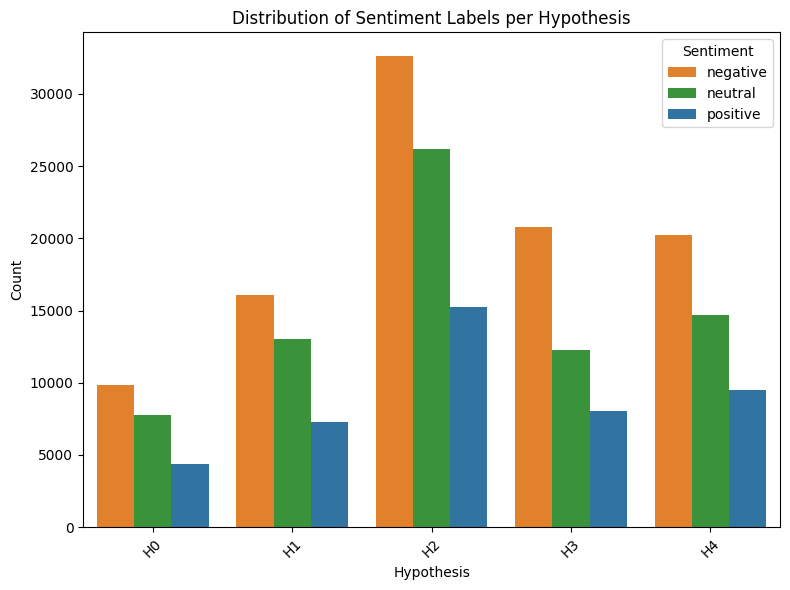

In [5]:
# Plot the distribution of sentiment labels for each hypothesis in a single graph
plt.figure(figsize=(8, 6))
color_palette = {'positive': '#1f77b4', 'negative': '#ff7f0e', 'neutral': '#2ca02c'}
sns.countplot(data=df, x='hypothesis', hue='sentiment', order=sorted(df['hypothesis'].unique()), palette=color_palette)
plt.title('Distribution of Sentiment Labels per Hypothesis')
plt.xlabel('Hypothesis')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# # Get unique hypotheses
# hypotheses = df['combined_hypothesis'].unique()

# # Plot the distribution of sentiment labels for each hypothesis
# for hypothesis in hypotheses:
#     subset = df[df['combined_hypothesis'] == hypothesis]
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=subset, x='sentiment', order=['positive', 'neutral', 'negative'])
#     plt.title(f'Distribution of Sentiment Labels for Hypothesis {hypothesis}')
#     plt.xlabel('Sentiment')
#     plt.ylabel('Count')
#     plt.show()

In [12]:
# Display some example rows for each sentiment
positive_examples = df[df['sentiment'] == 'positive'].sample(10)
neutral_examples = df[df['sentiment'] == 'neutral'].sample(10)
negative_examples = df[df['sentiment'] == 'negative'].sample(10)

print("Positive Examples:\n", positive_examples[['thread_text_processed']])
print("\nNeutral Examples:\n", neutral_examples[['thread_text_processed']])
print("\nNegative Examples:\n", negative_examples[['thread_text_processed']])

Positive Examples:
                                     thread_text_processed
147403  i would rather pay for a card where i would co...
168808  then it is not my job to judge it all of us pe...
56137   to describe my experience yeah the best word i...
58099   why not install a camera if the rent is droppe...
61312   aspi is always filled out before a trip to the...
129085  you are obviously an overly cautious person wh...
4597    dearly beloved ill tuck you in and kiss and st...
93673   i have heard the children who have been better...
16223    a brilliant idea to watch your wife i wonder ...
49741   the queen of mountain stations i did not focus...

Neutral Examples:
                                     thread_text_processed
13914   studies have already been carried out elsewher...
77705   the finnish masculine police department unders...
105454  there are so many sources that you can find th...
176399  which you may deserve you are a thief and you ...
200139  if you have been instruc

In [13]:
# yearly trend of hypothesis/ evolution
# key and dominant entities occuring in sentiment types
# research the reason of starting point of heated discussions
# evolution of camera implementations/ legislation frameword/ public camera installations / accidents

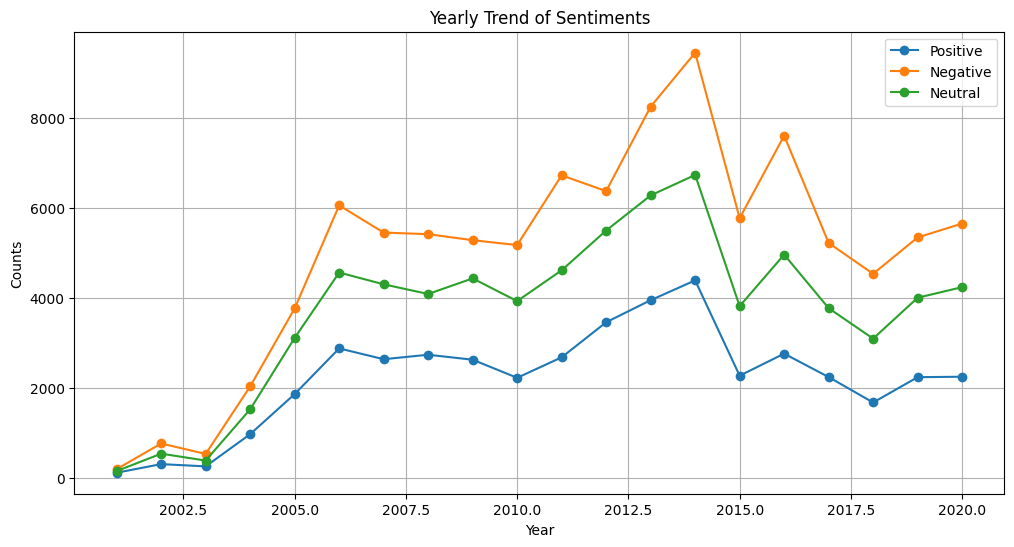

In [3]:
# Filter out rows with hypothesis '-1'
df_filtered = df[df['hypothesis'] != '-1']

# Convert datetime to datetime format and extract year
df_filtered['year'] = pd.to_datetime(df_filtered['datetime']).dt.year

# Group by year and sentiment
yearly_sentiment = df_filtered.groupby(['year', 'sentiment']).size().reset_index(name='counts')

# Pivot the table
yearly_sentiment_pivot = yearly_sentiment.pivot_table(index='year', columns='sentiment', values='counts', fill_value=0)

# Plot yearly trend for all sentiments
plt.figure(figsize=(12, 6))
if 'positive' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['positive'], marker='o', label='Positive')
if 'negative' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['negative'], marker='o', label='Negative')
if 'neutral' in yearly_sentiment_pivot.columns:
    plt.plot(yearly_sentiment_pivot.index, yearly_sentiment_pivot['neutral'], marker='o', label='Neutral')

plt.title('Yearly Trend of Sentiments')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()


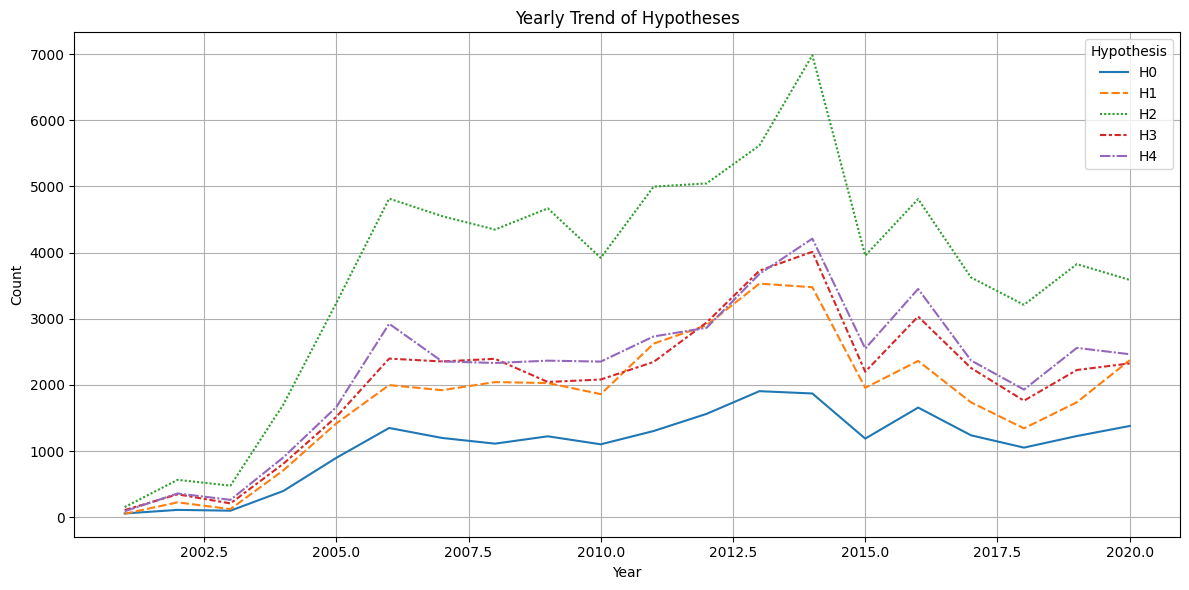

In [4]:
# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the year from the 'datetime' column
df['year'] = df['datetime'].dt.year

# Count the occurrences of each hypothesis per year
yearly_hypothesis_counts = df.groupby(['year', 'hypothesis']).size().reset_index(name='counts')

# Pivot the table to get hypotheses as columns
yearly_hypothesis_pivot = yearly_hypothesis_counts.pivot(index='year', columns='hypothesis', values='counts').fillna(0)

# Plot the yearly trend of each hypothesis
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_hypothesis_pivot)
plt.title('Yearly Trend of Hypotheses')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Hypothesis', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


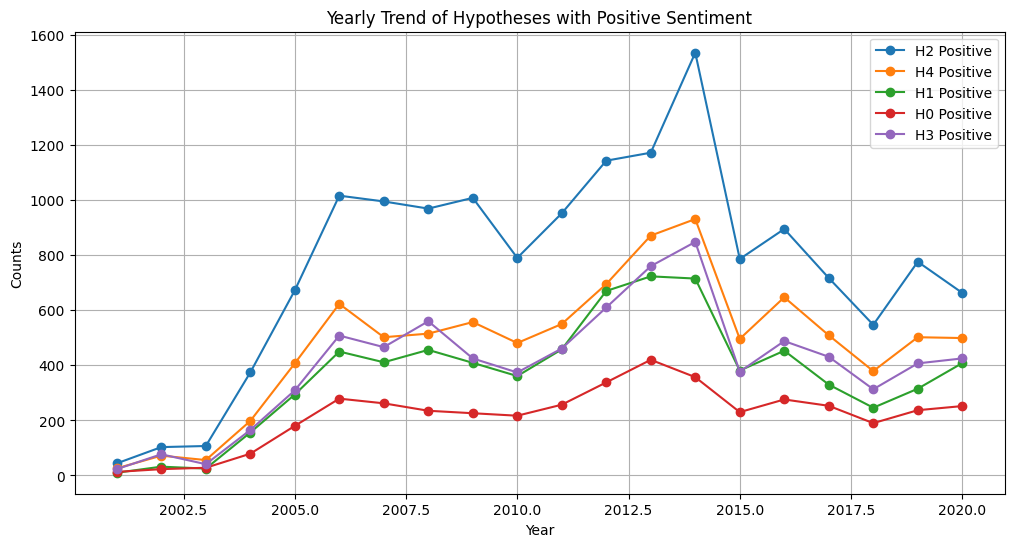

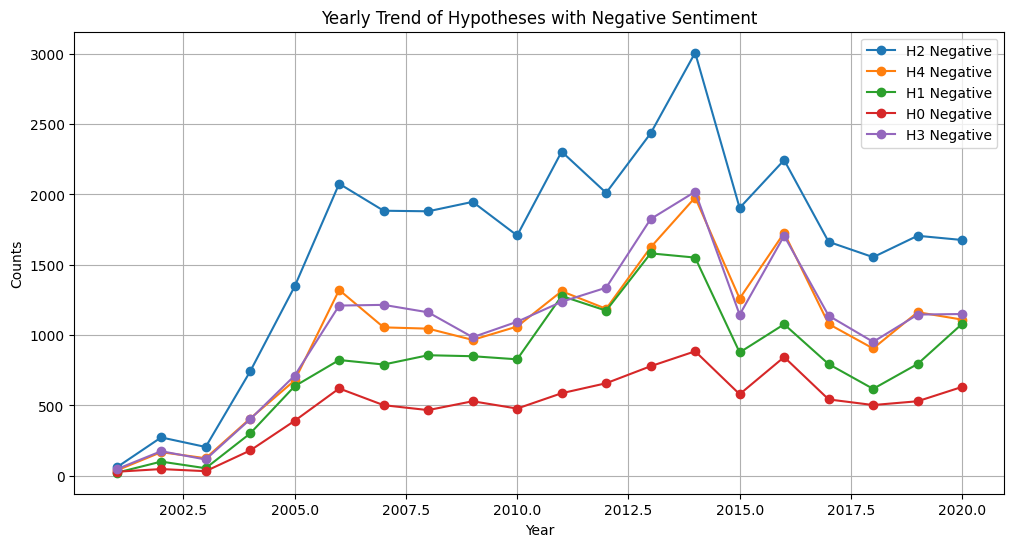

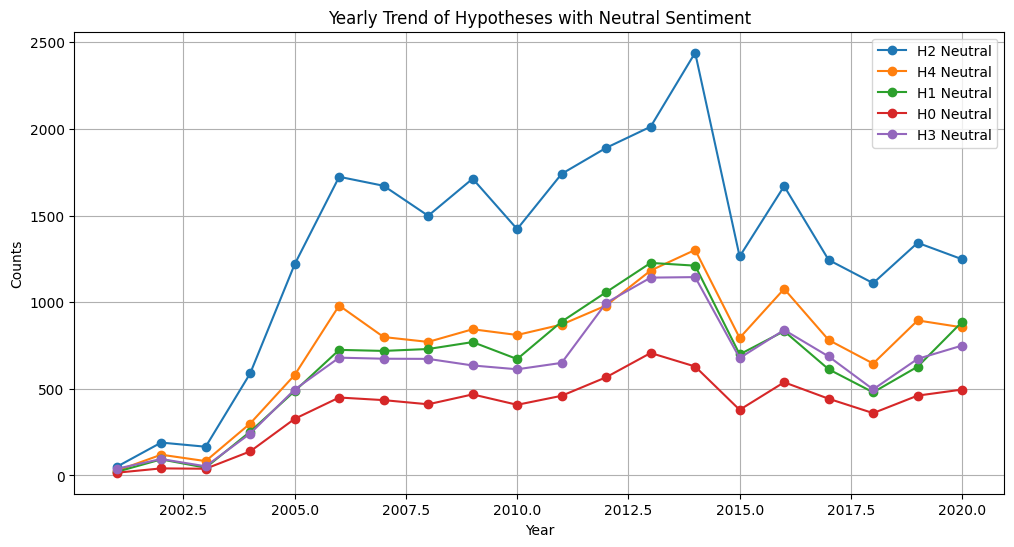

In [5]:
# Filter out rows with hypothesis '-1'
df_filtered = df[df['hypothesis'] != '-1']

# Convert datetime to datetime format and extract year
df_filtered['year'] = pd.to_datetime(df_filtered['datetime']).dt.year

# Group by year, hypothesis, and sentiment
yearly_hypothesis_sentiment = df_filtered.groupby(['year', 'hypothesis', 'sentiment']).size().reset_index(name='counts')

# Pivot the table
yearly_hypothesis_sentiment_pivot = yearly_hypothesis_sentiment.pivot_table(index='year', columns=['hypothesis', 'sentiment'], values='counts', fill_value=0)

# Plot positive sentiment
plt.figure(figsize=(12, 6))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'positive' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['positive'], marker='o', label=f'{hypothesis} Positive')

plt.title('Yearly Trend of Hypotheses with Positive Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot negative sentiment
plt.figure(figsize=(12, 6))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'negative' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['negative'], marker='o', label=f'{hypothesis} Negative')

plt.title('Yearly Trend of Hypotheses with Negative Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot neutral sentiment
plt.figure(figsize=(12, 6))
for hypothesis in df_filtered['hypothesis'].unique():
    if 'neutral' in yearly_hypothesis_sentiment_pivot[hypothesis].columns:
        plt.plot(yearly_hypothesis_sentiment_pivot.index, yearly_hypothesis_sentiment_pivot[hypothesis]['neutral'], marker='o', label=f'{hypothesis} Neutral')

plt.title('Yearly Trend of Hypotheses with Neutral Sentiment')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(loc='best')
plt.grid(True)
plt.show()


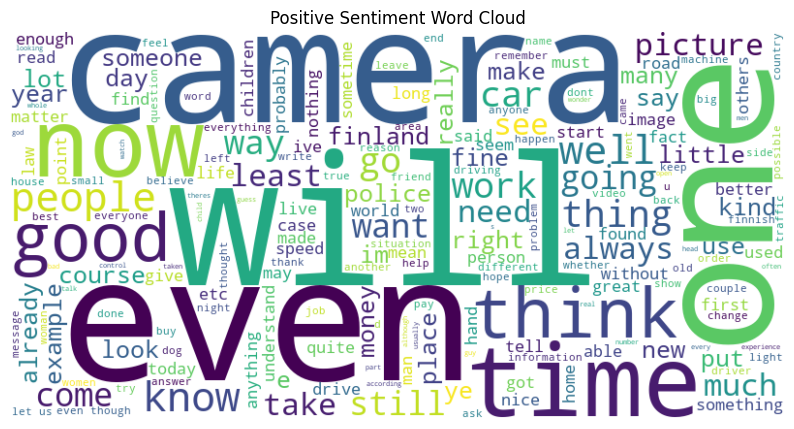

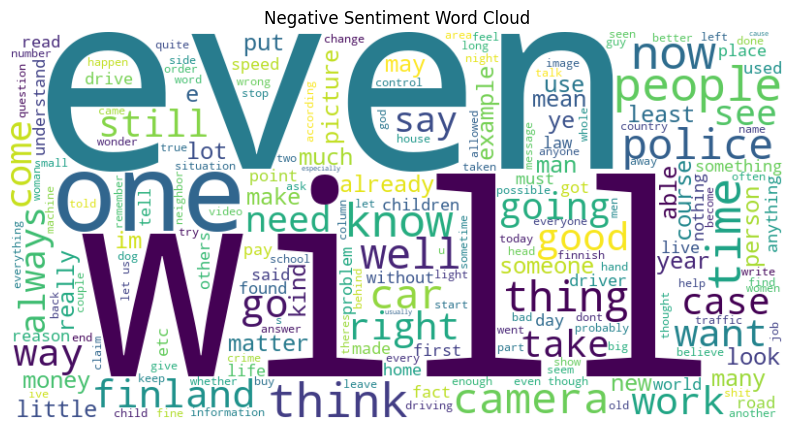

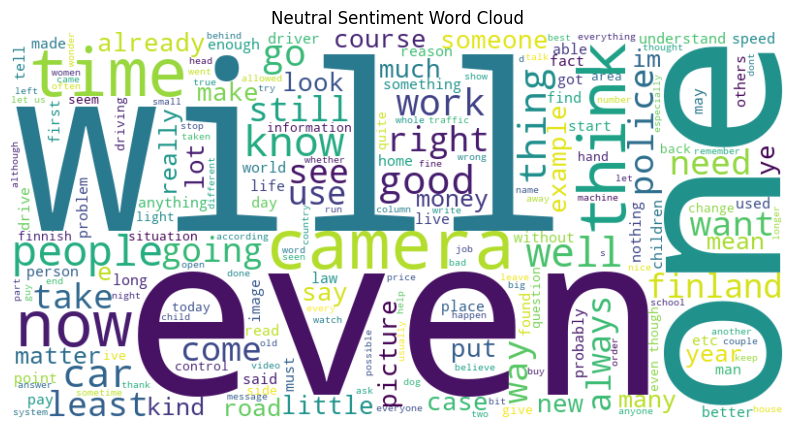

In [17]:
# Generate word clouds for each sentiment type
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Filter the texts by sentiment
positive_text = df[df['sentiment'] == 'positive']['thread_text_processed']
negative_text = df[df['sentiment'] == 'negative']['thread_text_processed']
neutral_text = df[df['sentiment'] == 'neutral']['thread_text_processed']

# Generate word clouds
generate_word_cloud(positive_text, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_text, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_text, 'Neutral Sentiment Word Cloud')


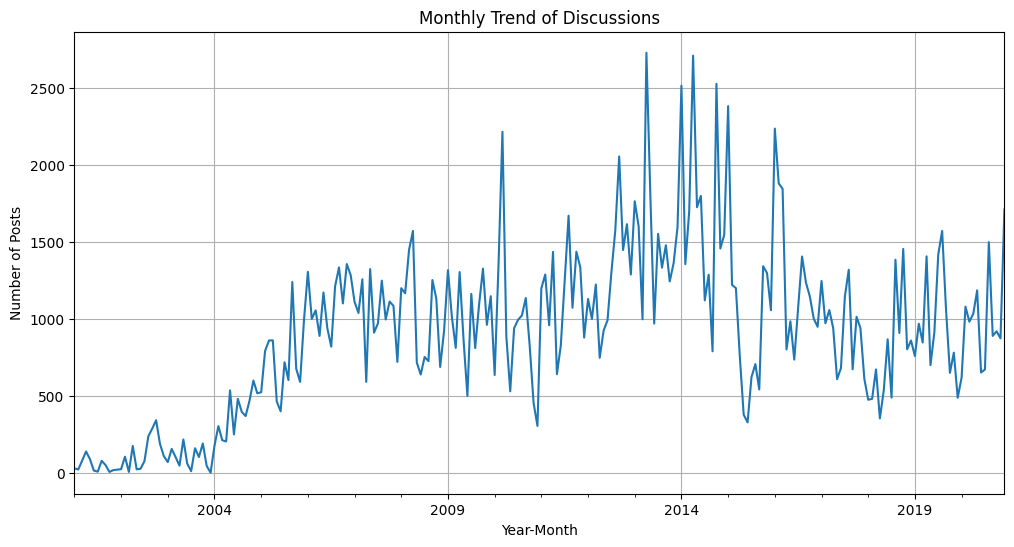

Top 10 months with highest increase in posts:
year_month
2014-10    1738.0
2013-04    1732.0
2016-01    1180.0
2014-04    1011.0
2014-01     918.0
2018-08     896.0
2011-01     895.0
2010-03     860.0
2020-12     837.0
2015-01     836.0
Freq: M, Name: count, dtype: float64


In [6]:
# Group by year and month to see trends over time
df['year_month'] = pd.to_datetime(df['datetime']).dt.to_period('M')
monthly_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Trend of Discussions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

# Find months with the highest increase in posts
monthly_counts_diff = monthly_counts.diff().dropna()
top_increases = monthly_counts_diff.nlargest(10)

print("Top 10 months with highest increase in posts:")
print(top_increases)
